## Libraries

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import pickle

## Libraries Explaination:

- #### PANDAS: A powerful library for data manipulation and analysis, especially useful for working with tabular data (DataFrames).
 
- #### NUMPY: Provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
 
- #### SEABORN: A statistical data visualization library based on matplotlib, which makes it easy to generate attractive and informative statistical graphics.
 
- #### MATPLOTLIB.pyplot:  A plotting library used for creating static, interactive, and animated visualizations in Python.
  
- #### sklearn.model_selection.train_test_split: A utility from scikit-learn to split datasets into training and testing sets for model evaluation.
  
- #### sklearn.svm.SVC: Support Vector Classification, a machine learning model for classification tasks.
  
- #### sklearn.metrics.accuracy_score: A function to compute the accuracy classification score, useful for evaluating classification models.
  
- #### PICKLE: A Python module used for serializing and de-serializing Python objects, commonly used to save and load trained machine learning models.

## Data Collection

In [35]:
# This cell is for reading a CSV file containing mental health data and displaying its structure and a sample of its contents,helping you understand what the dataset looks like before further analysis.

class Datacollector:
    def __init__(self, data_path):
        self.data_path ="C:\\Users\\HP\\Desktop\\OOP Project\\archive\\mental_health_dataset.csv"
        self.data = None

    def load_data(self):
        self.data = pd.read_csv("C:\\Users\\HP\\Desktop\\OOP Project\\archive\\mental_health_dataset.csv")
        print(f"Data loaded from {self.data_path}")
        return self.data

    def get_data_summary(self):
        if self.data is not None:
            print("Data Summary:")
            
        print("Data info:")
        print(self.data.info())
        print("\nfirst 6 rows of data:")
        print(self.data.head())

collector= Datacollector('data.csv')
data= collector.load_data()
collector.get_data_summary()

# This class is responsible for collecting,visualizing and managing the dataset.    

Data loaded from C:\Users\HP\Desktop\OOP Project\archive\mental_health_dataset.csv
Data Summary:
Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-nul

## Data Understanding

In [36]:
class DataUnderstanding:
# This class provides methods to understand the dataset, including displaying its structure, unique values in specific columns, and handling missing values.    

    def __init__(self, data):
        # Initialize with a pandas DataFrame
        self.data = data

    def overview(self):
        
        # Display basic info and stats about the dataset including shape, data types, first and last rows, unique values, and missing values.
        
        print("Shape of the data:", self.data.shape)
        
        print("\nData types:\n", self.data.dtypes)
        
        print("\nFirst 5 rows of the data:\n", self.data.head())
        
        print("\nColumns in the dataset:\n", self.data.columns.tolist())
        
        print("\nNumber of unique values in each column:\n", self.data.nunique())

        print("\nLast 5 rows of the data:\n", self.data.tail())

        print("\nMissing values:\n", self.data.isnull().sum())
        
        print("\nStatistical summary:\n", self.data.describe(include='all'))

    def unique_values(self, column):
        # Print unique values in a column
        unique_vals = self.data[column].unique()
        print(f"Unique values in '{column}':\n{unique_vals}")
        
understanding = DataUnderstanding(data)
understanding.overview()
understanding.unique_values('work_environment')

# This cell is designed to give a quick and thorough understanding of your dataset’s structure, contents, and potential issues (like missing values or unexpected categories), which is essential before any data analysis or modeling.

Shape of the data: (10000, 14)

Data types:
 age                         int64
gender                     object
employment_status          object
work_environment           object
mental_health_history      object
seeks_treatment            object
stress_level                int64
sleep_hours               float64
physical_activity_days      int64
depression_score            int64
anxiety_score               int64
social_support_score        int64
productivity_score        float64
mental_health_risk         object
dtype: object

First 5 rows of the data:
    age      gender employment_status work_environment mental_health_history  \
0   56        Male          Employed          On-site                   Yes   
1   46      Female           Student          On-site                    No   
2   32      Female          Employed          On-site                   Yes   
3   60  Non-binary     Self-employed          On-site                    No   
4   25      Female     Self-employed      

## Data Preprocessing

In [37]:
class DataPreprocessing:
# This class provides methods for preprocessing the dataset, including dropping irrelevant columns, filling missing values, encoding categorical variables, and normalizing numeric features. 
   
    def __init__(self, data):
        # Initialize with a pandas DataFrame
        self.data = data

    def drop_columns(self, columns):
        # Drop specified columns from the dataset
        self.data = self.data.drop(columns=columns)

    def fill_missing_with_mean(self, columns):
        # Fill missing values in specified columns with mean
        for col in columns:
            mean_val = self.data[col].mean()
            self.data[col] = self.data[col].fillna(mean_val)

    def fill_missing_with_mode(self, columns):
        # Fill missing values in specified columns with mode
        for col in columns:
            mode_val = self.data[col].mode()[0]
            self.data[col] = self.data[col].fillna(mode_val)

    def encode_categorical(self, columns):
        # Convert categorical columns to dummy/one-hot encoding
        self.data = pd.get_dummies(self.data, columns=columns)

    def normalize_columns(self, columns):
        # Normalize specified numeric columns (Min-Max scaling)
        for col in columns:
            min_val = self.data[col].min()
            max_val = self.data[col].max()
            self.data[col] = (self.data[col] - min_val) / (max_val - min_val)

preprocessor = DataPreprocessing(data)

# Drop irrelevant or too specific columns
preprocessor.drop_columns(['mental_health_history'])

# Fill missing numeric values
preprocessor.fill_missing_with_mean(['physical_activity_days', 'sleep_hours'])

# Fill missing categorical values
preprocessor.fill_missing_with_mode(['gender', 'seeks_treatment'])

# Encode categorical features
preprocessor.encode_categorical(['employment_status', 'mental_health_risk'])

# Normalize numeric columns
preprocessor.normalize_columns(['age', 'stress_level', 'depression_score'])

# Final clean data
processed_data = preprocessor.data
print(processed_data.head())

# This cell is designed to preprocess the dataset by cleaning it, handling missing values, encoding categorical variables, and normalizing numeric features, making it ready for analysis or modeling.

        age      gender work_environment seeks_treatment  stress_level  \
0  0.808511        Male          On-site             Yes      0.555556   
1  0.595745      Female          On-site             Yes      1.000000   
2  0.297872      Female          On-site              No      0.666667   
3  0.893617  Non-binary          On-site              No      0.333333   
4  0.148936      Female          On-site             Yes      0.222222   

   sleep_hours  physical_activity_days  depression_score  anxiety_score  \
0          6.2                       3          0.933333             17   
1          9.0                       4          1.000000             11   
2          7.7                       2          0.800000              7   
3          4.5                       4          0.200000              0   
4          5.4                       0          0.800000             12   

   social_support_score  productivity_score  employment_status_Employed  \
0                    54      

## Univariate Analysis

count    10000.000000
mean        15.039900
std          8.990839
min          0.000000
25%          7.000000
50%         15.000000
75%         23.000000
max         30.000000
Name: depression_score, dtype: float64


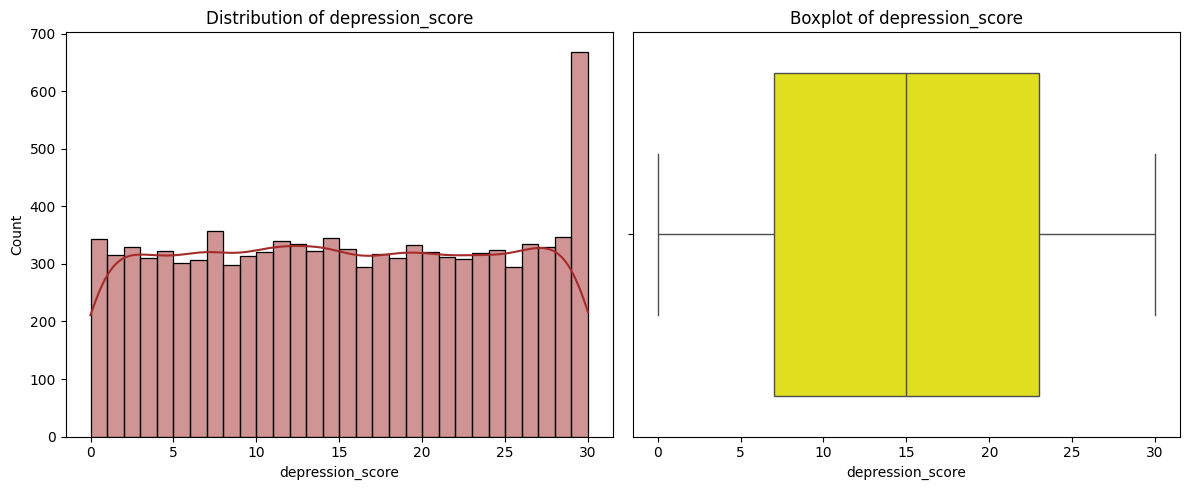

count    10000.000000
mean        41.557600
std         13.749581
min         18.000000
25%         30.000000
50%         41.500000
75%         53.000000
max         65.000000
Name: age, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_1652\2084390335.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=self.data[column], palette='Set2')


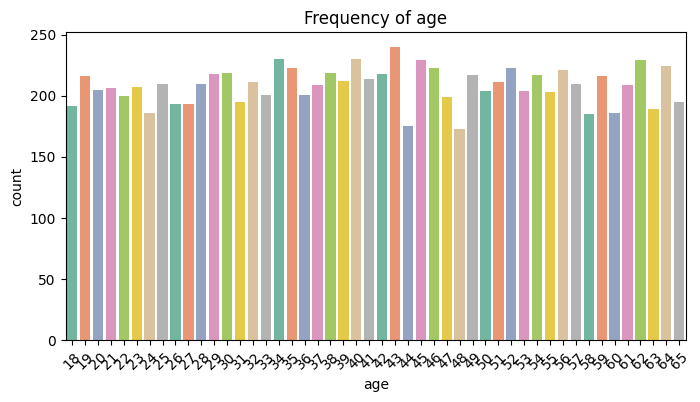

In [38]:
class UnivariateAnalysis:

# This class provides methods for univariate analysis, including descriptive statistics and visualizations for both numeric and categorical columns in the dataset.
    
    def __init__(self, data):
        # Initialize with a pandas DataFrame
        self.data = data

    def describe_column(self, column):
        # Print basic statistics of a column
        print(self.data[column].describe())

    def plot_numeric(self, column):
        # Plot histogram and boxplot for numeric column
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        sns.histplot(self.data[column], kde=True, bins=30, color='brown')
        plt.title(f'Distribution of {column}')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=self.data[column], color='yellow')
        plt.title(f'Boxplot of {column}')

        plt.tight_layout()
        plt.show()

    def plot_categorical(self, column):
        # Plot countplot for a categorical column
        plt.figure(figsize=(8, 4))
        sns.countplot(x=self.data[column], palette='Set2')
        plt.title(f'Frequency of {column}')
        plt.xticks(rotation=45)
        plt.show()
        
uni = UnivariateAnalysis(data)

# For numeric column
uni.describe_column('depression_score')
uni.plot_numeric('depression_score')

# For categorical column
uni.describe_column('age')
uni.plot_categorical('age')

# This cell is designed to perform univariate analysis on the dataset, providing descriptive statistics and visualizations for both numeric and categorical columns, helping you understand the distribution and characteristics of individual features.

count    10000.000000
mean         6.473000
std          1.473944
min          3.000000
25%          5.500000
50%          6.500000
75%          7.500000
max         10.000000
Name: sleep_hours, dtype: float64


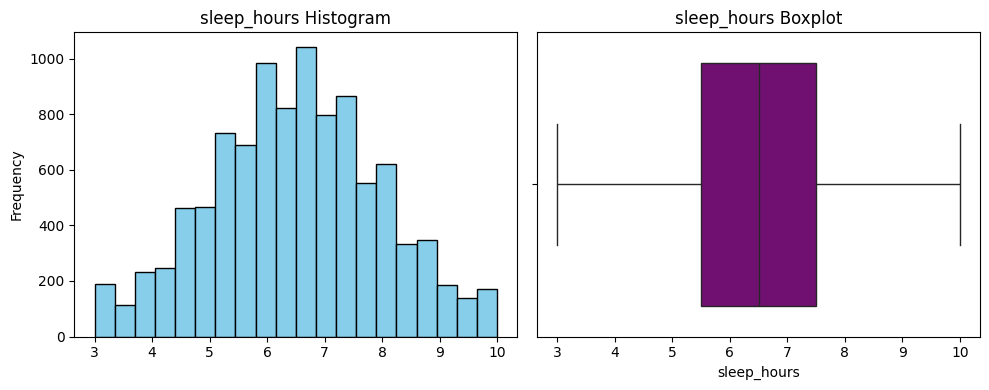

count       10000
unique          3
top       On-site
freq         5044
Name: work_environment, dtype: object


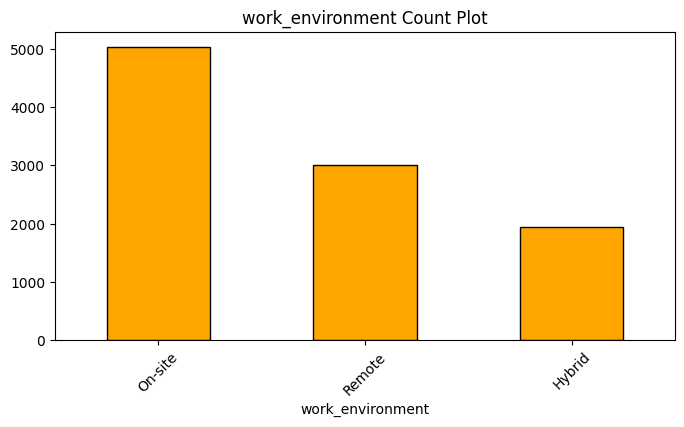

In [39]:
class UnivariateAnalysis:
    
# This class provides methods for univariate analysis, including descriptive statistics and visualizations for both numeric and categorical columns in the dataset.
    
    def __init__(self, data):
        self.data = data

    def describe_column(self, column):
        print(self.data[column].describe())

    def plot_numeric(self, column):
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        self.data[column].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
        plt.title(f'{column} Histogram')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=self.data[column], color='purple')
        plt.title(f'{column} Boxplot')

        plt.tight_layout()
        plt.show()

    def plot_categorical(self, column):
        plt.figure(figsize=(8, 4))
        self.data[column].value_counts().plot(kind='bar', color='orange', edgecolor='black')
        plt.title(f'{column} Count Plot')
        plt.xticks(rotation=45)
        plt.show()
uni = UnivariateAnalysis(processed_data)

# For numeric column
uni.describe_column('sleep_hours')
uni.plot_numeric('sleep_hours')

# For categorical column
uni.describe_column('work_environment')
uni.plot_categorical('work_environment')

# This cell is designed to perform univariate analysis on the dataset, providing descriptive statistics and visualizations for both numeric and categorical columns, helping you understand the distribution and characteristics of individual features.

## Bivariate Analysis

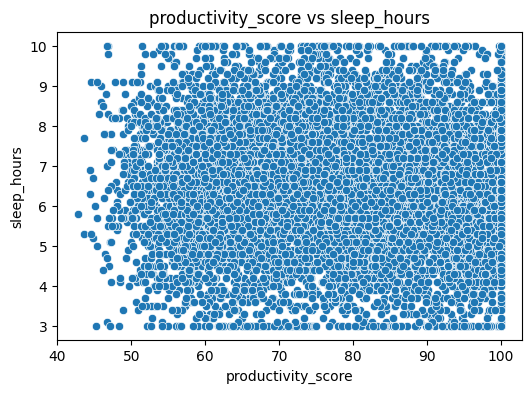

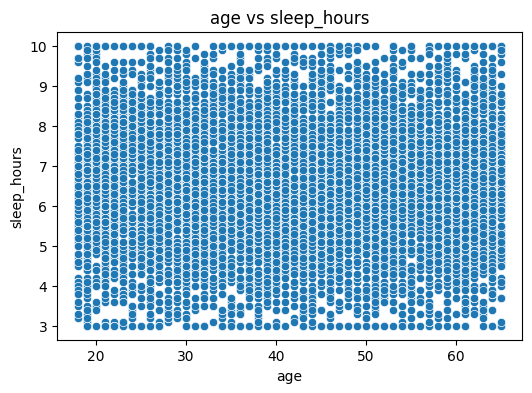

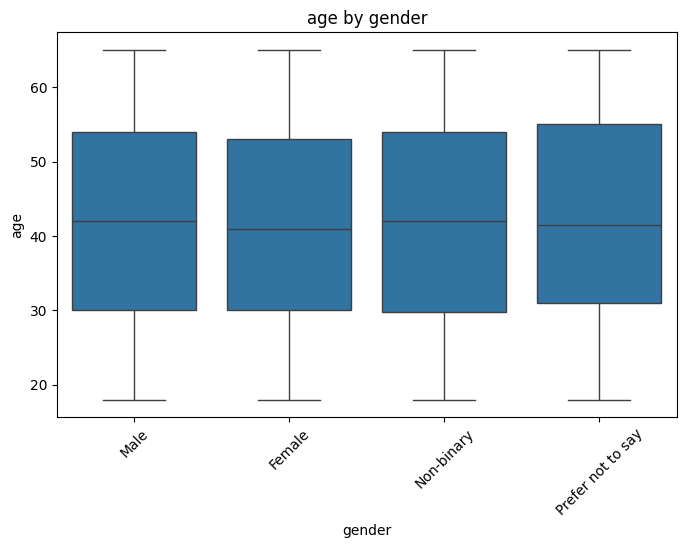

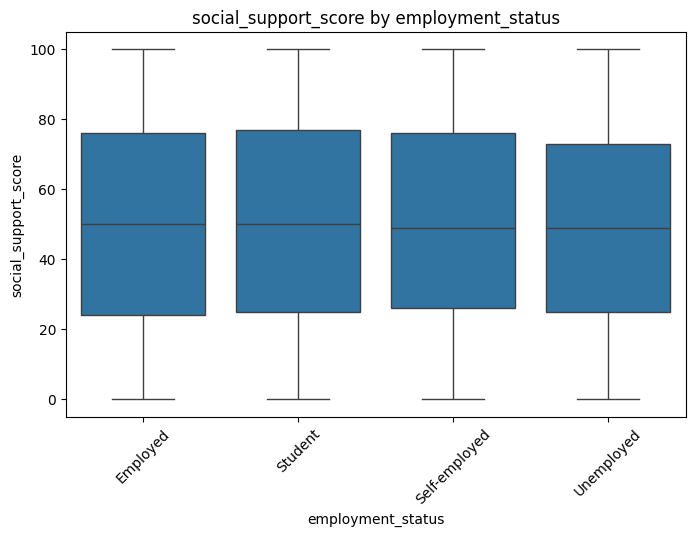

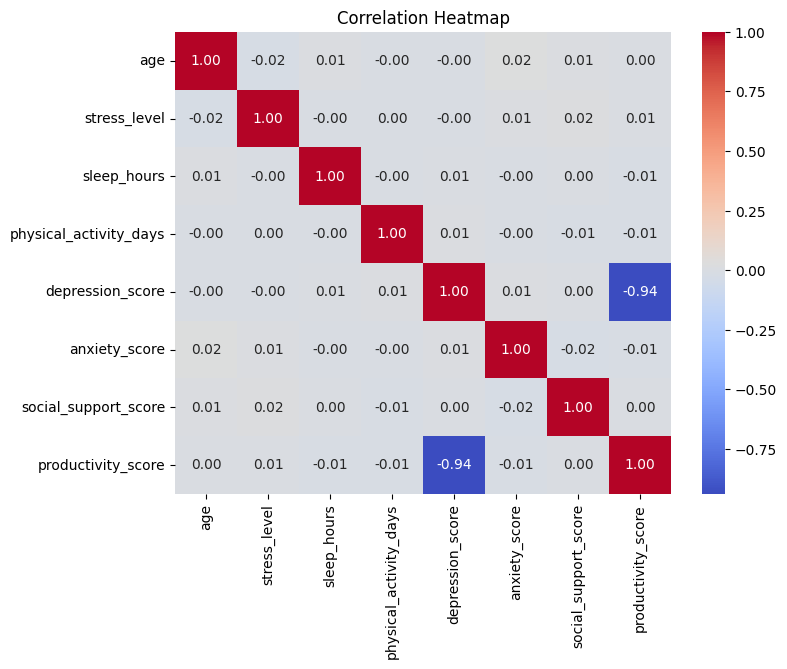

In [40]:
class BivariateAnalysis:

# This class provides methods for bivariate analysis, including scatter plots for numeric vs numeric relationships, box plots for categorical vs numeric relationships, and a correlation heatmap for numeric columns in the dataset.

    def __init__(self, data):
        # Initialize with a pandas DataFrame
        self.data = data

    def scatter_plot(self, x, y):
        # Scatter plot for numeric vs numeric
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=self.data[x], y=self.data[y])
        plt.title(f'{x} vs {y}')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

    def box_plot(self, x, y):
        # Box plot for categorical vs numeric
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=self.data[x], y=self.data[y])
        plt.title(f'{y} by {x}')
        plt.xticks(rotation=45)
        plt.show()

    def correlation_heatmap(self):
        # Correlation heatmap for numeric columns
        plt.figure(figsize=(8, 6))
        corr = self.data.corr(numeric_only=True)
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap')
        plt.show()
        
biv = BivariateAnalysis(data)

# Numeric vs numeric
biv.scatter_plot('productivity_score', 'sleep_hours')
biv.scatter_plot('age', 'sleep_hours')

# Categorical vs numeric
biv.box_plot('gender', 'age')
biv.box_plot('employment_status', 'social_support_score')

# Correlation heatmap
biv.correlation_heatmap()

# This cell is designed to perform bivariate analysis on the dataset, providing insights into relationships between pairs of features through scatter plots, box plots, and a correlation heatmap, helping you understand how different features interact with each other.

## Data Splitting

In [41]:
class DataSplitter:

# This class is responsible for splitting the dataset into training and testing sets, allowing for model training and evaluation.
    
    def __init__(self, data, target_column):
        # Store the full dataset and target column
        self.data = data
        self.target_column = target_column

    def split(self, test_size=0.2, random_state=42):
        # Split the data into features (X) and target (y)
        X = self.data.drop(columns=[self.target_column])
        y = self.data[self.target_column]

        # Perform train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        # Store and return splits
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

        return X_train, X_test, y_train, y_test
splitter = DataSplitter(processed_data, target_column='productivity_score')
X_train, X_test, y_train, y_test = splitter.split(test_size=0.2)
print(X_train,y_train,X_test,y_test)

# This cell is designed to split the dataset into training and testing sets, allowing for model training and evaluation, ensuring that the model can generalize well to unseen data.

           age  gender work_environment seeks_treatment  stress_level  \
9254  0.872340  Female           Remote             Yes      0.444444   
1561  0.085106  Female           Remote              No      0.666667   
1670  0.702128  Female          On-site             Yes      0.222222   
6087  0.489362    Male          On-site             Yes      0.333333   
6669  0.914894    Male           Remote              No      0.777778   
...        ...     ...              ...             ...           ...   
5734  0.063830    Male           Hybrid              No      0.888889   
5191  0.127660    Male           Hybrid              No      0.888889   
5390  0.148936  Female           Remote             Yes      0.888889   
860   0.085106  Female           Hybrid              No      1.000000   
7270  0.489362  Female          On-site              No      0.222222   

      sleep_hours  physical_activity_days  depression_score  anxiety_score  \
9254          9.4                       7    

## Data Training

In [42]:
class ModelTrainer:
    
# This class is responsible for training a Support Vector Machine (SVM) regression model on the training data and evaluating its performance on test data.
    
    def __init__(self, X_train, y_train):
        # Store training data
        self.X_train = X_train
        self.y_train = y_train
        self.model = None

    def train_svm(self, kernel='rbf', C=1.0, epsilon=0.1):
        # Train SVM Regression model
        self.model = SVR(kernel=kernel, C=C, epsilon=epsilon)
        self.model.fit(self.X_train, self.y_train)
        print("SVM model trained successfully.")
        return self.model

    def evaluate(self, X_test, y_test):
        # Evaluate the trained model
        predictions = self.model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"R² Score: {r2:.2f}")
        
# Ensure all categorical columns are encoded for SVR
categorical_cols = ['gender', 'work_environment', 'seeks_treatment']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols)

# Align columns in case some categories are missing in test/train
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

trainer = ModelTrainer(X_train_encoded, y_train)

# Train the model
svm_model = trainer.train_svm(kernel='rbf', C=10, epsilon=0.2)

# Evaluate the model
trainer.evaluate(X_test_encoded, y_test)

# This cell is designed to train a Support Vector Machine (SVM) regression model on the training data and evaluate its performance on test data, providing insights into the model's predictive capabilities.

SVM model trained successfully.
Mean Squared Error: 99.92
R² Score: 0.49


## Model storage using pickle

In [43]:
class ModelStorage:
    
# This class is responsible for saving and loading the trained model to/from a file, allowing for persistence and reuse of the model without retraining.
    
    def __init__(self, model):
        # Store the trained model
        self.model = model

    def save_model(self, filename):
        # Save the model to a file
        with open(filename, 'wb') as file:
            pickle.dump(self.model, file)
        print("Model saved to", filename)

    def load_model(self, filename):
        # Load a model from file
        with open(filename, 'rb') as file:
            self.model = pickle.load(file)
        print("Model loaded from", filename)
        return self.model
# Save the trained model
storage = ModelStorage(svm_model)
storage.save_model('svm_laptop_model.pkl')

# Load it later
loaded_model = storage.load_model('svm_laptop_model.pkl')

# This cell is designed to save and load the trained model to/from a file, allowing for persistence and reuse of the model without retraining, ensuring that the model can be easily shared or deployed later.

Model saved to svm_laptop_model.pkl
Model loaded from svm_laptop_model.pkl
